# Analise Exploratória

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [38]:
df = pd.read_csv('D:\pastas\projetos_py\credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [39]:
# Renomeando as colunas
df.rec = df.rename(columns={'person_age': 'idade', 
                   'person_income': 'rendimento_anual', 
                   'person_home_ownership':'moradia', 
                   'person_emp_length': 'temp_trabalho', 
                   'loan_intent': 'motivo',
                  'loan_grade': 'grau',
                  'loan_amnt': 'valor',
                  'loan_int_rate': 'taxa_juros',
                  'loan_status': 'status',
                  'loan_percent_income': 'renda',
                  'cb_person_default_on_file': 'hist_pagamento',
                  'cb_person_cred_hist_length': 'anos_emprestimo'})

C:\Users\ezequ\AppData\Local\Temp\ipykernel_20472\2707538456.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.rec = df.rename(columns={'person_age': 'idade',


In [40]:
df.rec.head()

,idade,rendimento_anual,moradia,temp_trabalho,motivo,grau,valor,taxa_juros,status,renda,hist_pagamento,anos_emprestimo
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [41]:
df.rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idade             32581 non-null  int64  
 1   rendimento_anual  32581 non-null  int64  
 2   moradia           32581 non-null  object 
 3   temp_trabalho     31686 non-null  float64
 4   motivo            32581 non-null  object 
 5   grau              32581 non-null  object 
 6   valor             32581 non-null  int64  
 7   taxa_juros        29465 non-null  float64
 8   status            32581 non-null  int64  
 9   renda             32581 non-null  float64
 10  hist_pagamento    32581 non-null  object 
 11  anos_emprestimo   32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [42]:
# Retirando valores nulos
df.rec2 = df.rec.dropna()
df.rec2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idade             28638 non-null  int64  
 1   rendimento_anual  28638 non-null  int64  
 2   moradia           28638 non-null  object 
 3   temp_trabalho     28638 non-null  float64
 4   motivo            28638 non-null  object 
 5   grau              28638 non-null  object 
 6   valor             28638 non-null  int64  
 7   taxa_juros        28638 non-null  float64
 8   status            28638 non-null  int64  
 9   renda             28638 non-null  float64
 10  hist_pagamento    28638 non-null  object 
 11  anos_emprestimo   28638 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


C:\Users\ezequ\AppData\Local\Temp\ipykernel_20472\3959450269.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.rec2 = df.rec.dropna()


Descriçao das colunas:

    1.IDADE - idade em anos do cliente
    2.RENDIMENTO_ANUAL -  quanto o cliente ganha em 1 ano, valor em reais
    3.MORADIA - atual estado de moradia, pode ser aluguel, casa propria ou hipotecado
    4.TEMP_TRABALHO - quantidade de anos que o cliente estar em serviço no seu ultimo emprego
    5.MOTIVO - razão pela qual precisa do dinheiro
    6.GRAU - uma medida de importância, se tratando de valores concedidos.
    7.VALOR - valor em reais solicitado pelo cliente
    8.TAXA_JUROS -  taxa cobrada pelo banco
    9.STATUS - omissão ou não do pagamento de alguma parcela, 0= pagou, 1=não pagou
    10.RENDA - valor da razão entre valor/rendimento_anual
    11.HIST_PAGAMENTO - se o cliente tem historico de ser um mal pagador ou não, diferentemente do status, aqui o cliente não  efetuou o pagamento em situações sucessivas
    12.ANOS_EMPRESTIMO - quantidade em anos do tempo de emprestimo ativo.


aqui podemos ver um panorama geral do tipo de cliente que temos.

na grande maioria, possui entre 20 e 30 anos, mora de aluguel,solicita emprestimos com valores bem proximos do rendimento anual para serem pagos em torno de 4 anos.

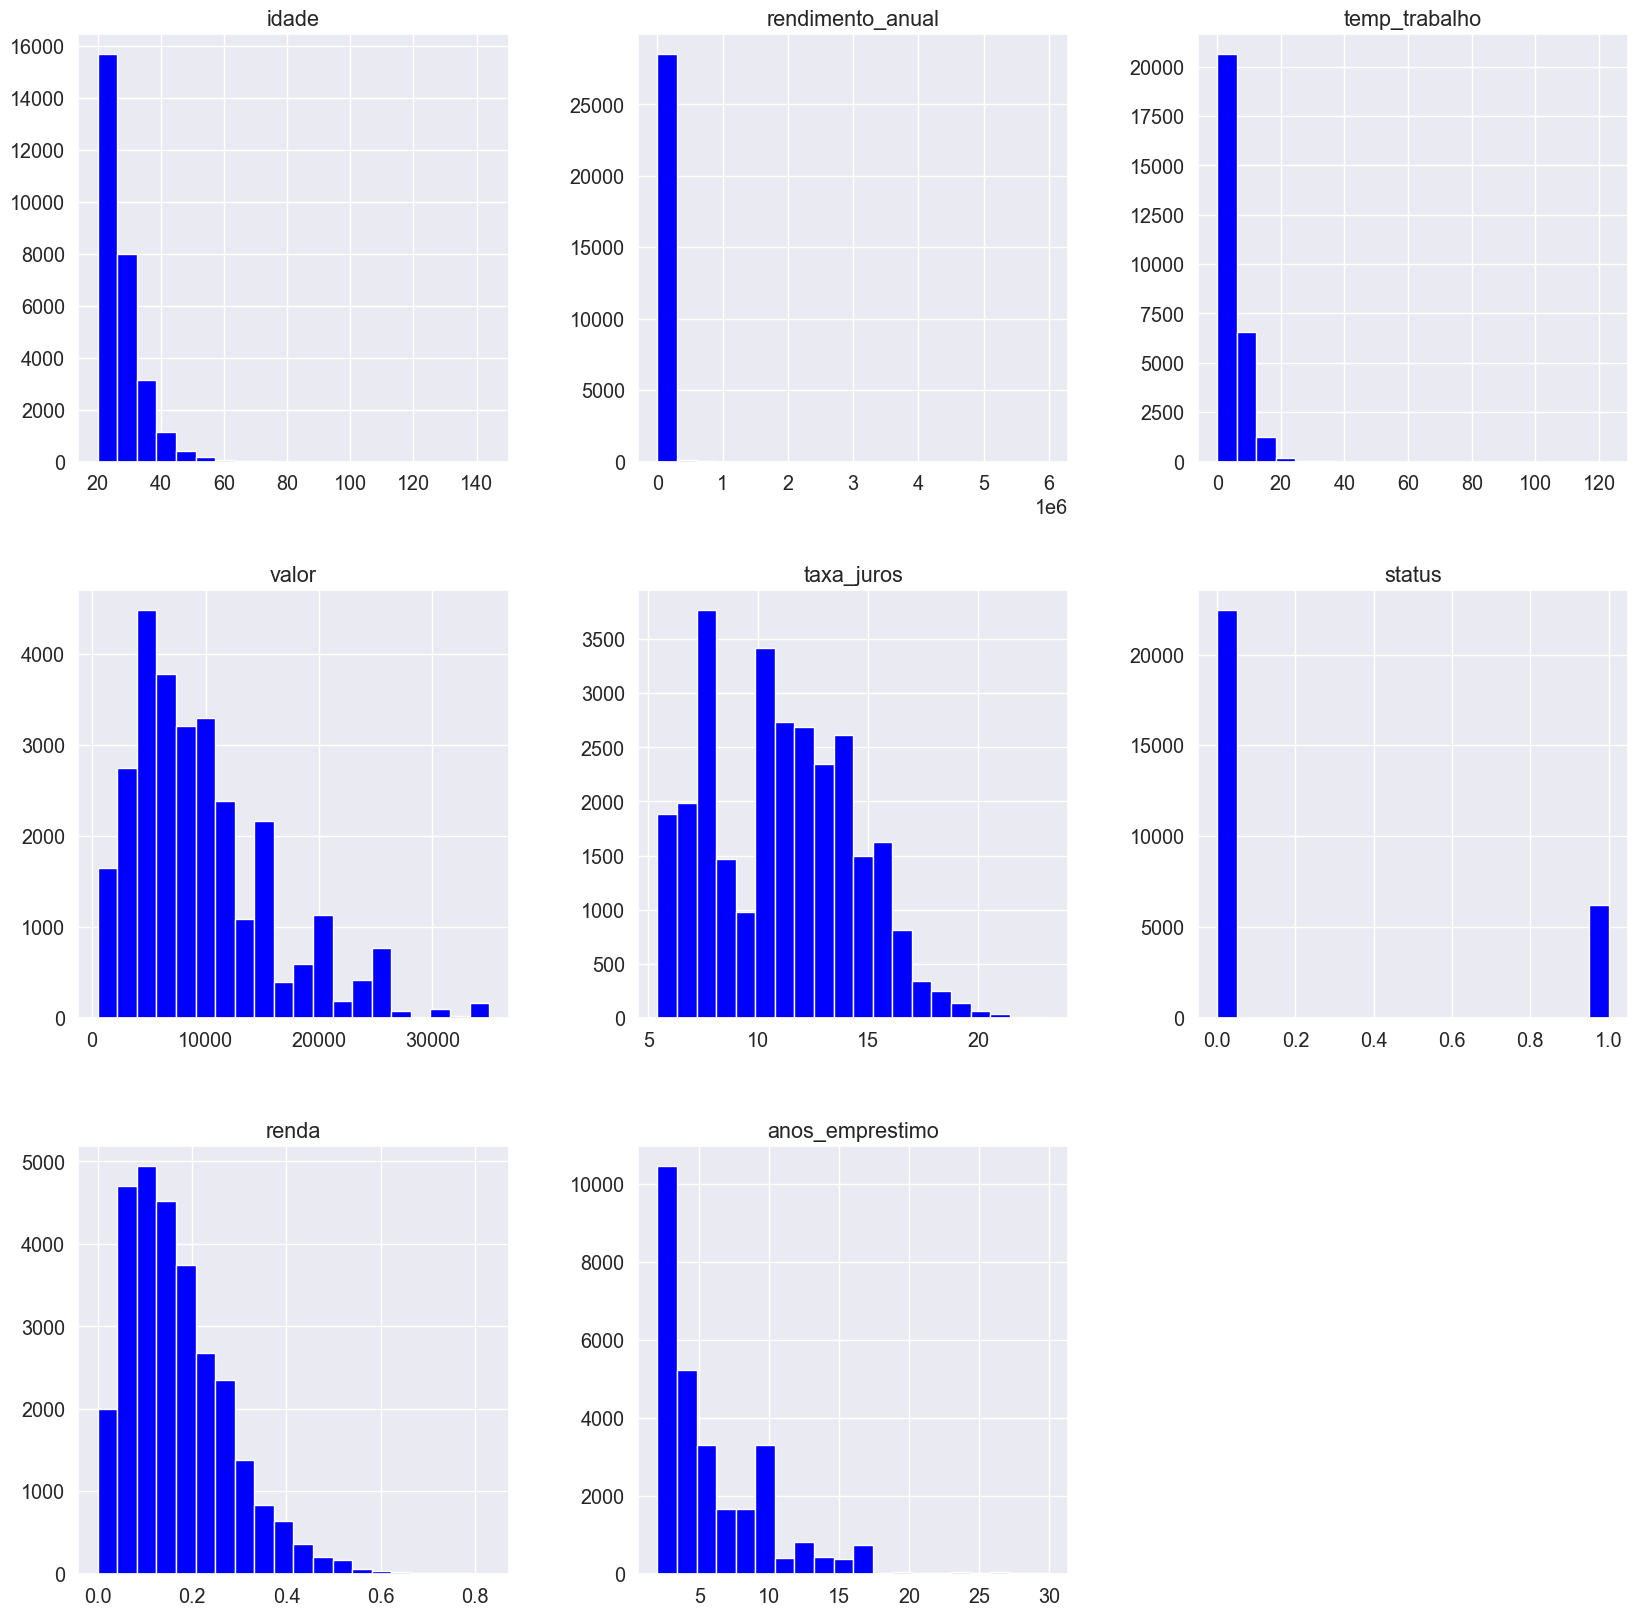

In [43]:
# plotando a frequencia dascolunas 
sns.set(font_scale = 1.3, rc={'figure.figsize':(20,20)})
eixo = df.rec2.hist(bins = 20, color = 'blue')

Podemos ver através desses garficos um perfil geral dos clientes do banco. eles são em sua maioria pessoas com,

    -25 à 30 anos
    -solicitam emprestimos com valores proximos do ganho anual
    -pagam o emprestio em torno de 5 anos
    -taxas de 10% a 15% 

Text(0.5, 1.0, 'Dispersão do Valor Solicitado')

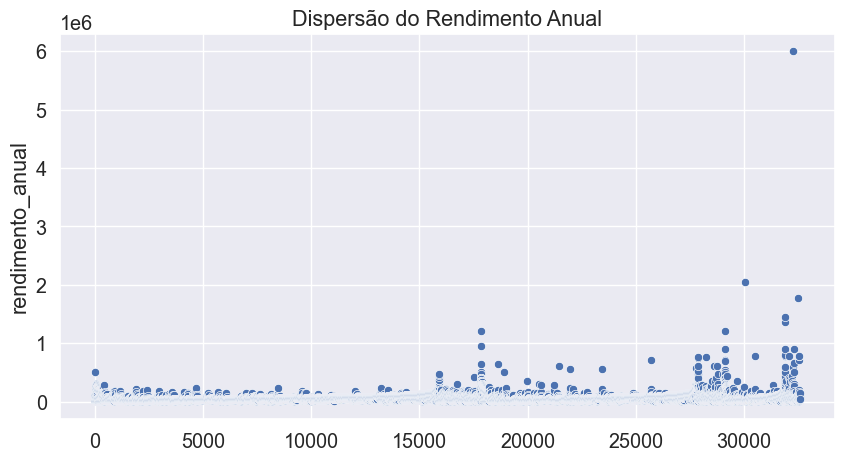

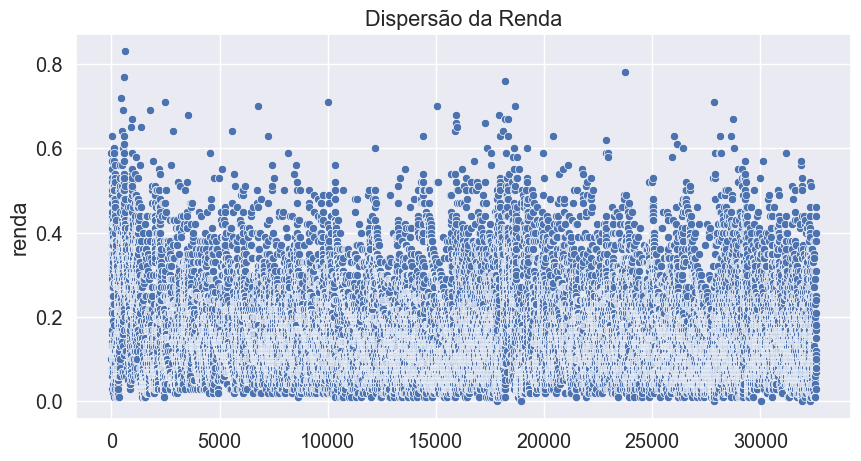

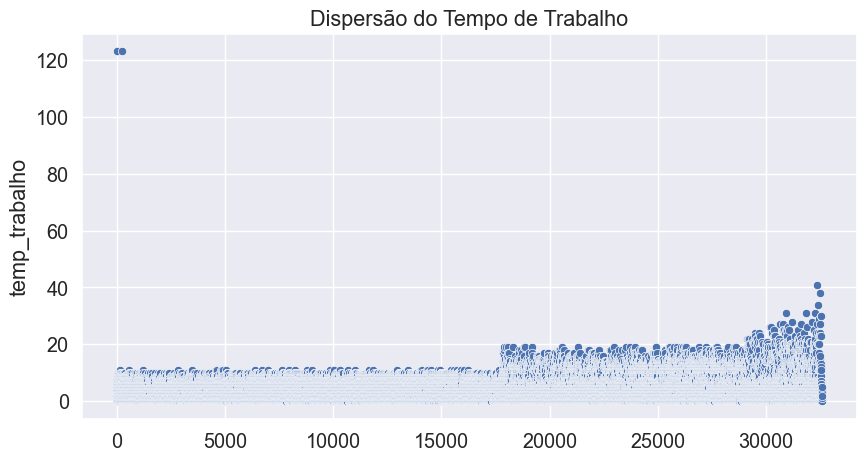

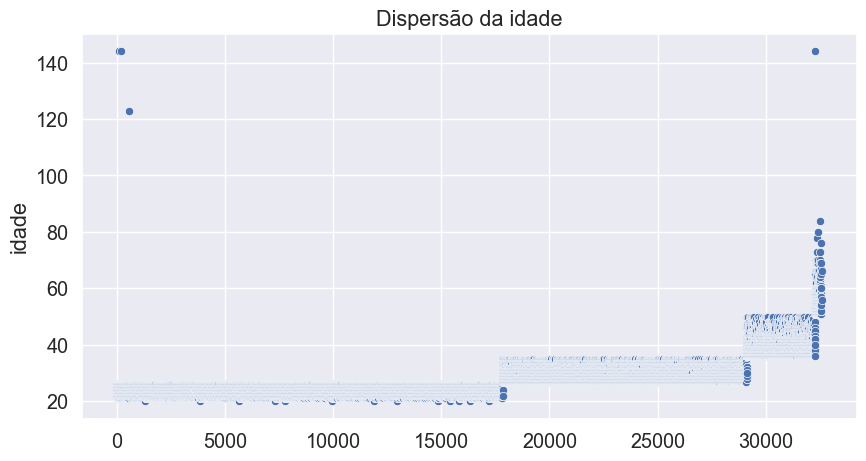

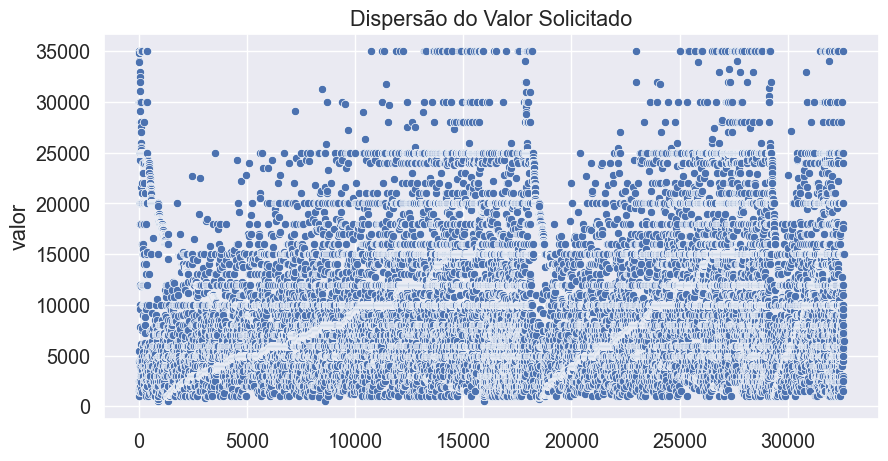

In [44]:
# Plotando graficos de dispersão de algumas colunas

plt.figure(figsize=(10,5))
sns.scatterplot(data = df.rec2.rendimento_anual).set_title('Dispersão do Rendimento Anual')

plt.figure(figsize=(10,5))
sns.scatterplot(data = df.rec2.renda).set_title('Dispersão da Renda')

plt.figure(figsize=(10,5))
sns.scatterplot(data = df.rec2.temp_trabalho).set_title('Dispersão do Tempo de Trabalho')

plt.figure(figsize=(10,5))
sns.scatterplot(data = df.rec2.idade).set_title('Dispersão da idade')

plt.figure(figsize=(10,5))
sns.scatterplot(data = df.rec2.valor).set_title('Dispersão do Valor Solicitado')




A plotagem dos graficos revelaram outliers presentes em algumas colunas. será nescessario retirar tais valores para não atrapalhar nas analises e aplicação do modelo.

In [45]:
# removendo valores ireais e transformando nomeclaturas em numeros

df_remove = df.rec2.loc[(df.rec2['idade'] >100) | (df.rec2['temp_trabalho'] > 80) | (df.rec2['rendimento_anual'] > 1000000 )]
df_corrigido = df.rec2.drop(df_remove.index)

df_corrigido['hist_pagamento'] = df_corrigido['hist_pagamento'].apply(lambda x: 0 if x == 'N' else 1)

map_moradia = {'OWN':1, 'MORTGAGE':2,'RENT':3,'OTHER':4}
df_corrigido['moradia']= df_corrigido['moradia'].replace(map_moradia)

map_motivo = {'EDUCATION':1, 'MEDICAL':2,'VENTURE':3,'PERSONAL':4, 'HOMEIMPROVEMENT':5, 'DEBTCONSOLIDATION':6}
df_corrigido['motivo']= df_corrigido['motivo'].replace(map_motivo)

map_grau = {'A':1, 'B':2,'C':3,'D':4, 'E':5, 'F':6,'G':7}
df_corrigido['grau']= df_corrigido['grau'].replace(map_grau)

In [46]:
df_corrigido.head()

,idade,rendimento_anual,moradia,temp_trabalho,motivo,grau,valor,taxa_juros,status,renda,hist_pagamento,anos_emprestimo
1,21,9600,1,5.0,1,2,1000,11.14,0,0.10,0,2
2,25,9600,2,1.0,2,3,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,2,3,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,2,3,35000,14.27,1,0.55,1,4
5,21,9900,1,2.0,3,1,2500,7.14,1,0.25,0,2


<AxesSubplot:>

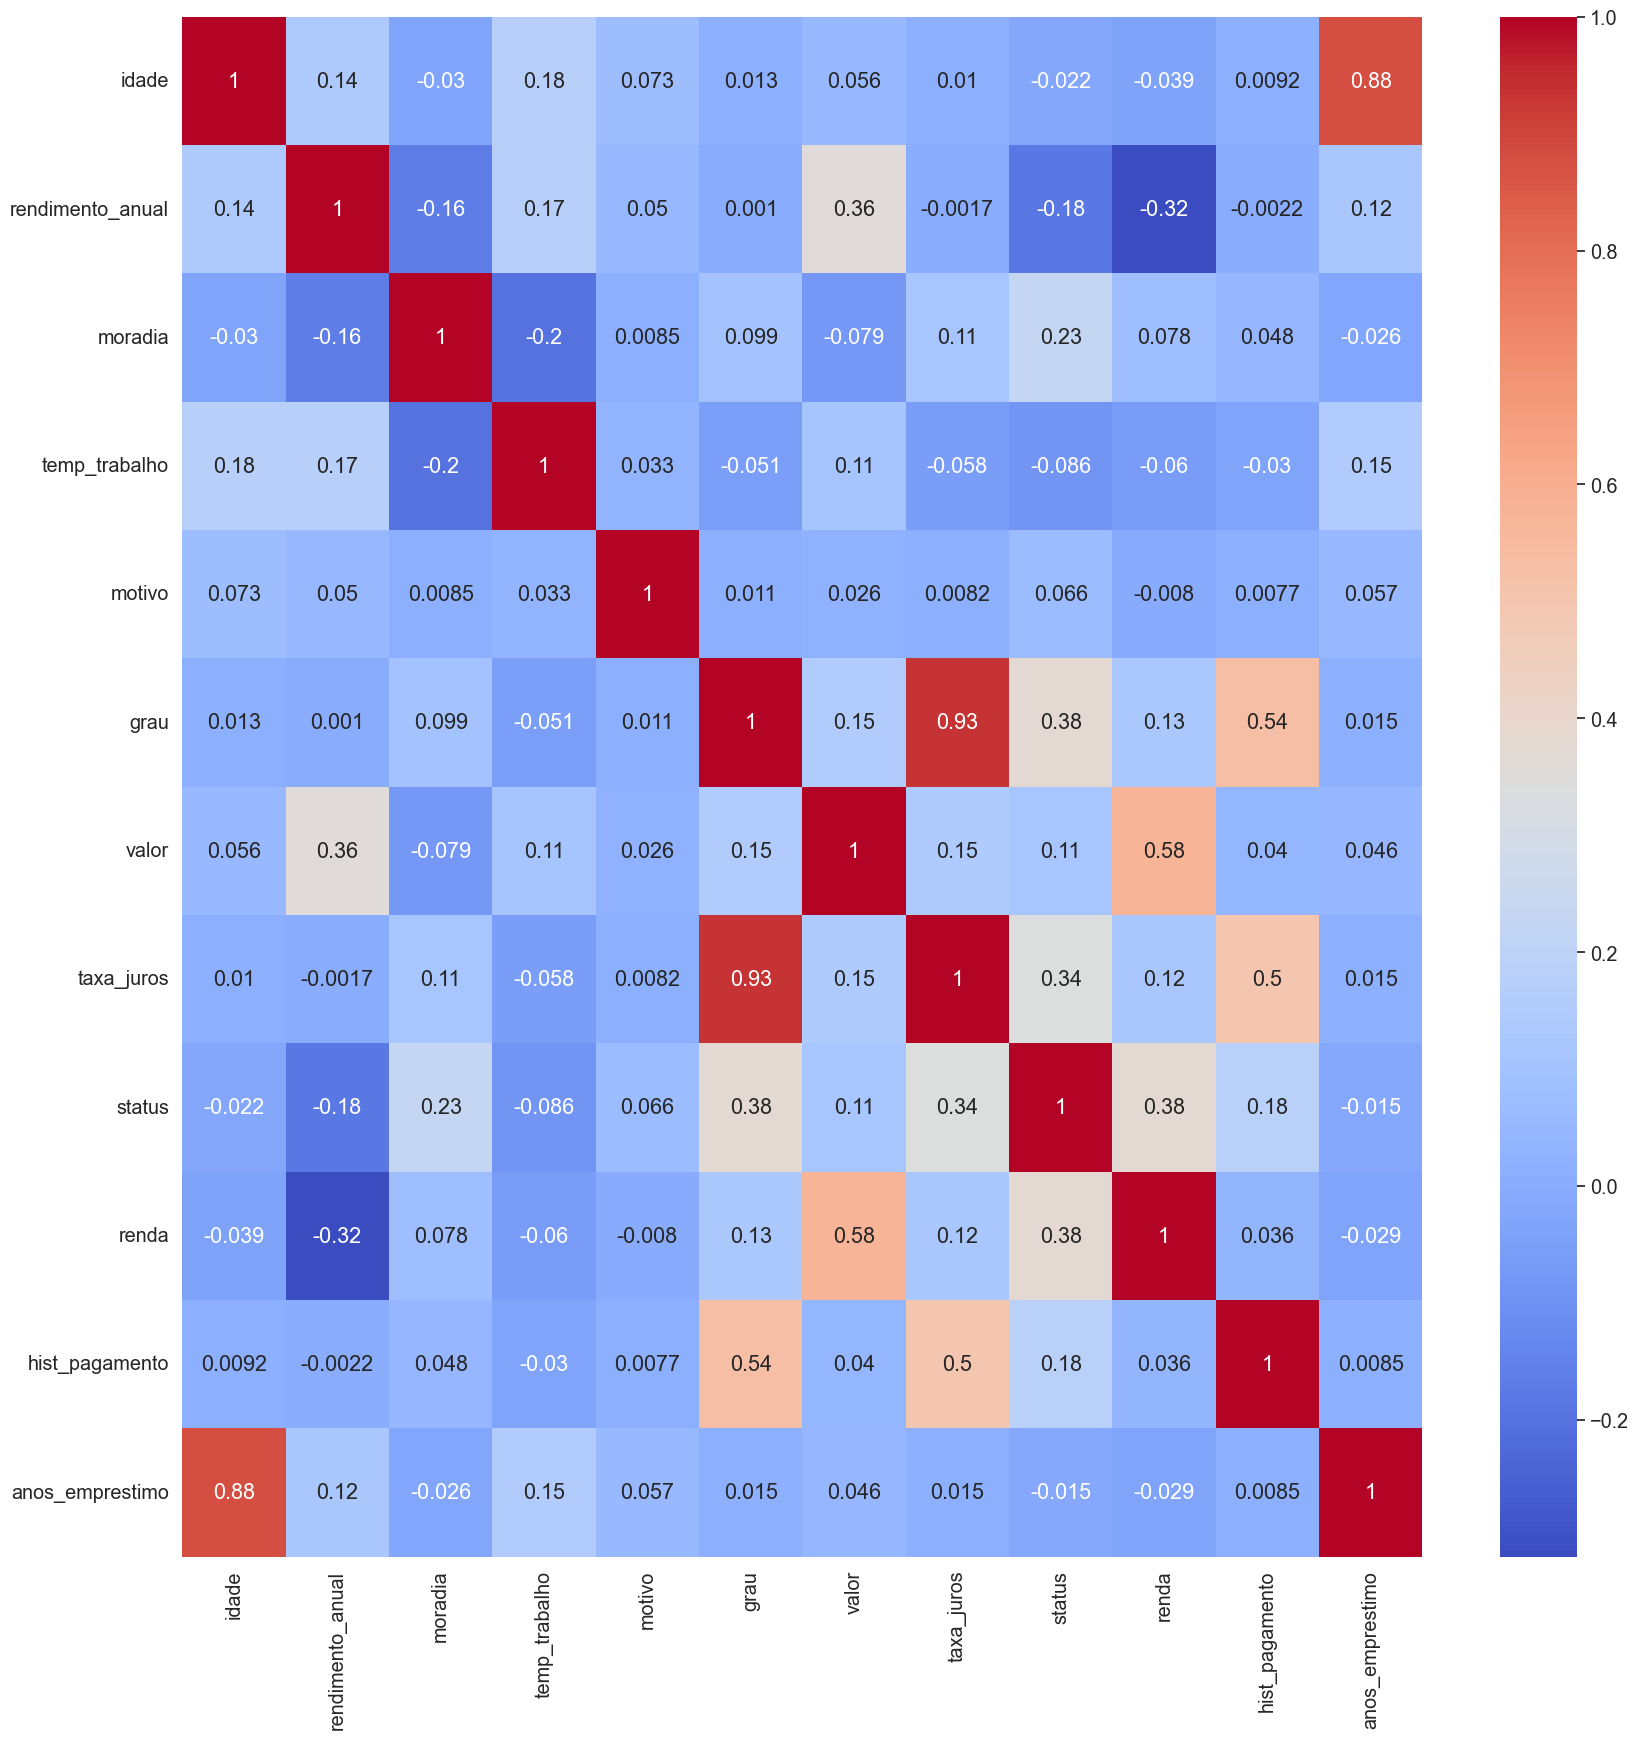

In [47]:
# plotando a correlação das colunas
matriz_correlacao = df_corrigido.corr()
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm')

Text(0.5, 1.0, 'Relação Juros/Historico de Pagamento')

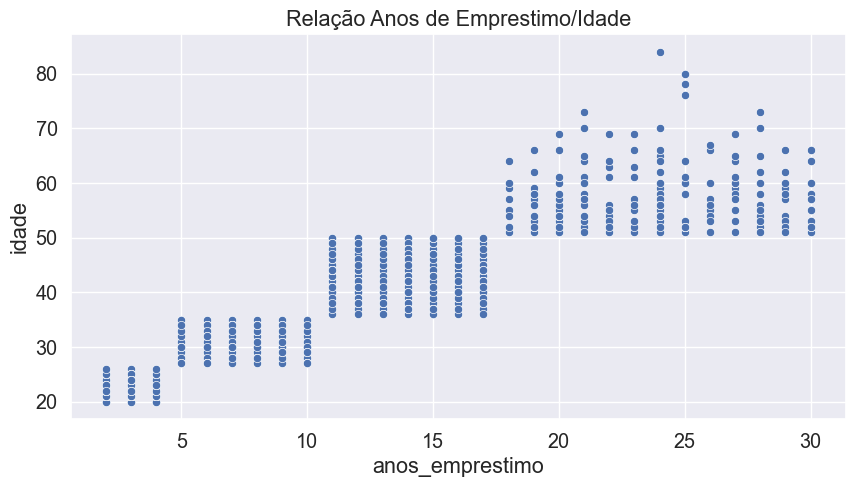

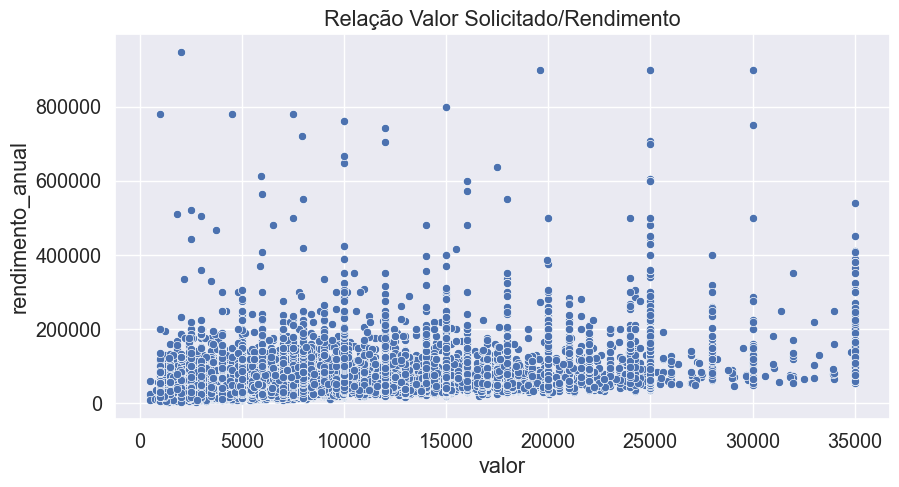

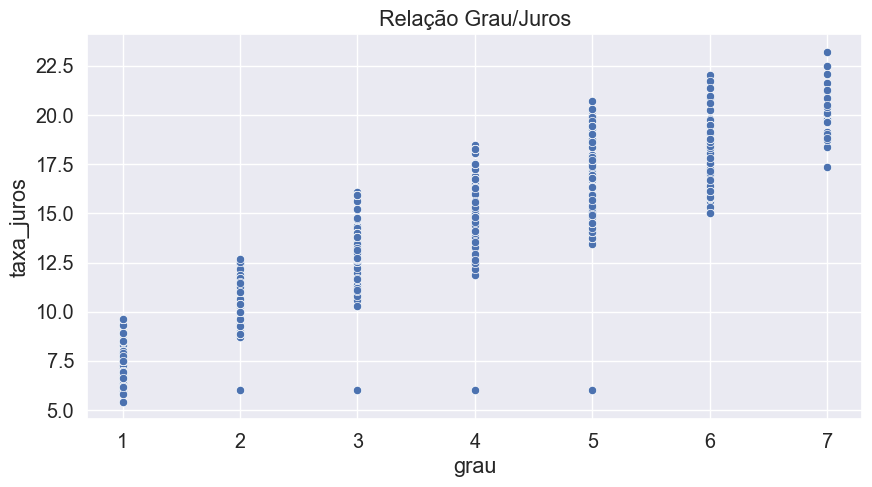

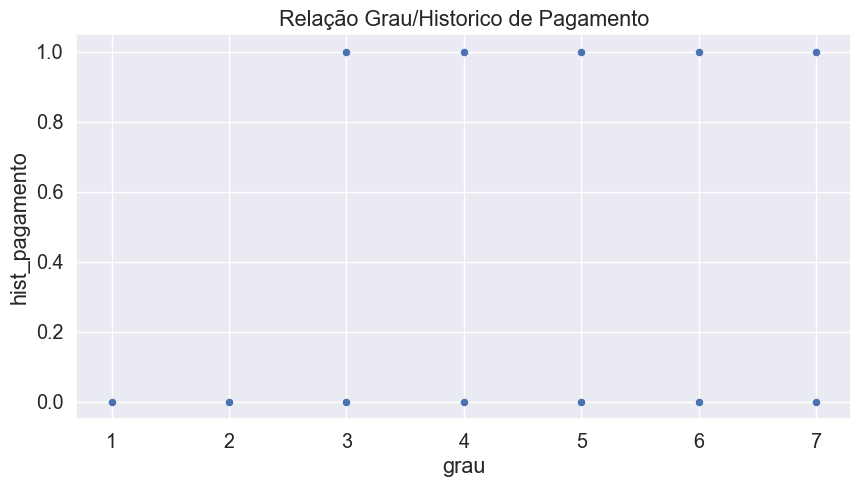

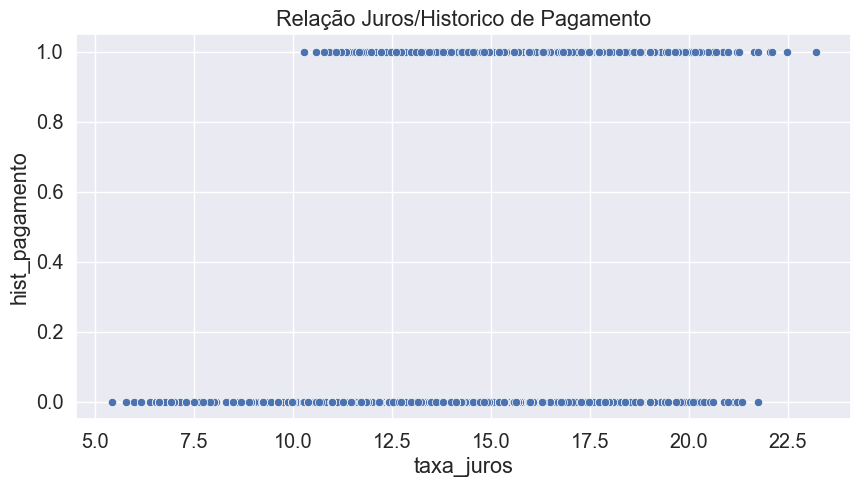

In [48]:
# plotando as relações mais fortes

plt.figure(figsize=(10,5))
sns.scatterplot(data = df_corrigido, x= 'anos_emprestimo', y = 'idade').set_title('Relação Anos de Emprestimo/Idade')

plt.figure(figsize=(10,5))
sns.scatterplot(data = df_corrigido, x= 'valor', y = 'rendimento_anual').set_title('Relação Valor Solicitado/Rendimento')

plt.figure(figsize=(10,5))
sns.scatterplot(data = df_corrigido, x= 'grau', y = 'taxa_juros').set_title('Relação Grau/Juros')

plt.figure(figsize=(10,5))
sns.scatterplot(data = df_corrigido, x= 'grau', y = 'hist_pagamento').set_title('Relação Grau/Historico de Pagamento')

plt.figure(figsize=(10,5))
sns.scatterplot(data = df_corrigido, x= 'taxa_juros', y = 'hist_pagamento').set_title('Relação Juros/Historico de Pagamento')




Obtemos uma informação importante para os negocios. Clientes com taxas de juros acima de 10% possuem dificuldades para pagar suas dividas.

Tambem podemos ver alguns valores fora do padrâo no grafico de relação 'juros/grau', vamos retirar esses valores da coluna para não atrapalha o modelo.

Text(0.5, 1.0, 'Relação Grau/Juros')

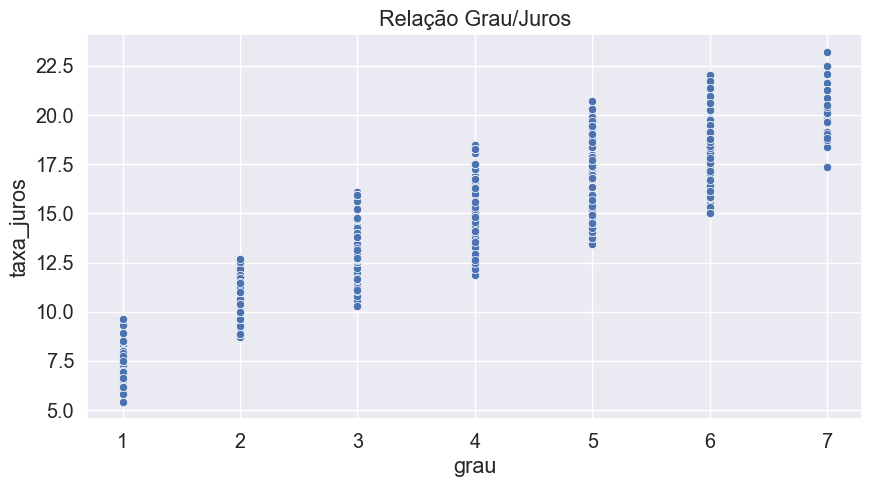

In [49]:
# Retirando outliers da relação juros/grau

df_cont = df_corrigido.loc[((df_corrigido['grau'] == 2) |
                            (df_corrigido['grau'] == 3) |  
                            (df_corrigido['grau'] == 4) |
                            (df_corrigido['grau'] == 5)) &
                           (df_corrigido['taxa_juros'] <7.5)]
df_corrigido = df_corrigido.drop(df_cont.index)

plt.figure(figsize=(10,5))
sns.scatterplot(data = df_corrigido, x= 'grau', y = 'taxa_juros').set_title('Relação Grau/Juros')


#  Aplicação do modelo de previsão

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [51]:
# separando as variaveisem independentes e depensentes

recursos = df_corrigido.iloc[:, [5,7,9]].values
previsor = df_corrigido.iloc[:, [10]].values
print(recursos)
print(previsor)

[[ 2.   11.14  0.1 ]
 [ 3.   12.87  0.57]
 [ 3.   15.23  0.53]
 ...
 [ 2.   10.99  0.46]
 [ 2.   11.48  0.1 ]
 [ 2.    9.99  0.15]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


Utilizamos as colunas de grau, juros e Renda para prever o pagamento. A escolha se deu pelo fato de existir uma boa correlação dessas colunas com a variavel destino (historico de pagamento).

In [52]:
# Dividindo em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(recursos, previsor, test_size=0.3)  # 30% dos dados sao pra teste

In [53]:
# Treinando o modelo
funçao_logistica = LogisticRegression()
funçao_logistica.fit(x_treino, y_treino)

C:\Users\ezequ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [54]:
# Aplicando o modelo no conjunto teste
previsoes = funçao_logistica.predict(x_teste)
confusion_matrix(y_teste,previsoes)

array([[6597,  486],
       [ 980,  522]], dtype=int64)

Aqui o modelo teve mais acertos em definir quem é um bom pagador, no plot seguinte podemos ver em porcentagens os acertos do modelo. acurácia ficou em 83% o que é um valor significativo ja que temos um numero maior de bons pagadores no conjunto de dados.

In [55]:
print(classification_report(y_teste,previsoes))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7083
           1       0.52      0.35      0.42      1502

    accuracy                           0.83      8585
   macro avg       0.69      0.64      0.66      8585
weighted avg       0.81      0.83      0.82      8585



(array([23514.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  5101.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

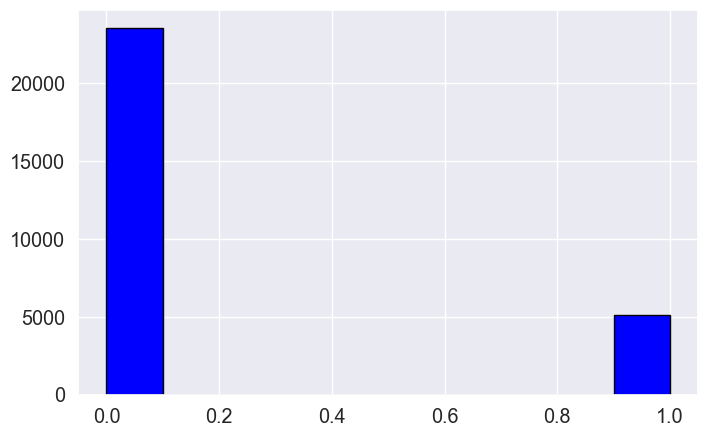

In [56]:
# plotando a frequencia de bons e mals pagadores
plt.figure(figsize=(8,5))
plt.hist(df_corrigido.hist_pagamento, bins=10, color='blue', edgecolor='black')

Agora vamos utilizar o modelo de arvore de decisão para avaliar e comparar com o metodo anterior. mas antes vamos tentar equilibrar a quantidade de valores da coluna 'hist_pagamento'

In [61]:
df_ajuste = df_corrigido.loc[(df_corrigido['hist_pagamento'] == 0)][5000:]
df_corrigido = df_corrigido.drop(df_ajuste.index)

(array([5000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5101.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

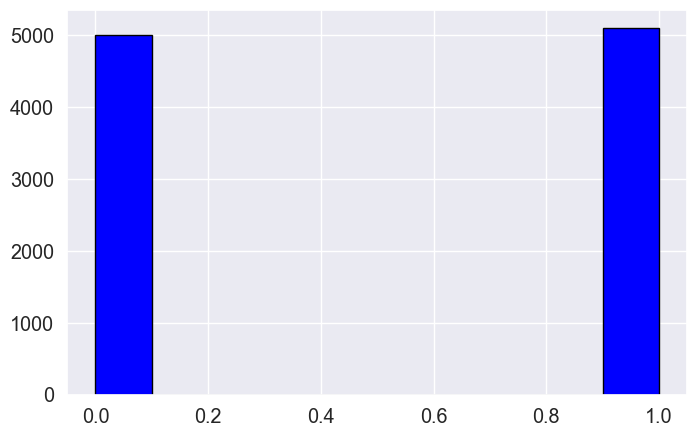

In [67]:
plt.figure(figsize=(8,5))
plt.hist(df_corrigido.hist_pagamento, bins=10, color='blue', edgecolor='black')

In [62]:
from sklearn.tree import DecisionTreeClassifier


In [68]:
recursos = df_corrigido.iloc[:, [5,7,9]].values
previsor = df_corrigido.iloc[:, [10]].values
x_treino, x_teste, y_treino, y_teste = train_test_split(recursos, previsor, test_size=0.3)

In [69]:
# Treinando o modelo
arv_risc_credit = tree.DecisionTreeClassifier(criterion = 'entropy')
arv_risc_credit = arv_risc_credit.fit(x_treino, y_treino)

In [70]:
# Aplicando o modelo
previ = arv_risc_credit.predict(x_teste)
confusion_matrix(y_teste,previ)

array([[1226,  257],
       [ 293, 1255]], dtype=int64)

In [71]:
print(classification_report(y_teste,previ))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1483
           1       0.83      0.81      0.82      1548

    accuracy                           0.82      3031
   macro avg       0.82      0.82      0.82      3031
weighted avg       0.82      0.82      0.82      3031



podemos ver que o modelo DecisionTreeClassifier conseguiu classificar com o mesmo valor de acurácia, porem, diferentemente do modelo anterior, a arvore recebeu valores equilibrados e por isso gerou valores equilibrados.

# conclusão

    Aplicamos dois modelos para prever o risco de credito que o banco possui ao oferecer emprestimos aos clientes. A previsão se deu em duas categorias, ruim ou bom representadas em 1 e 0, respectivamente. Os modelos aplicados apresentaram acurácia mediana mas para os dados disponiveis se mostraram bons previsores, os dados disponiveis não possuiam informaçoes de correlação que normalmente se espera na vida real, por exemplo informações de casa propria, salario alto e estabilidade no emprego sao dados que mostram um excelente perfil para oferecer emprestimo mas aqui utilizamos informaçao de juros para prever se o cliente vai honrrar com o pagamento ou não, o que nao faria sentido utilzar na vida real. 
    